## **Code following guidelines from book**
# **Hands On Machine Learning**
<img src='https://m.media-amazon.com/images/I/71UF9mDAX3L._AC_UF1000,1000_QL80_.jpg' width=30%>

In [89]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [90]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [91]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


___
<h1>DATA EXPLORATION</h1>

___

In [92]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [93]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [94]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


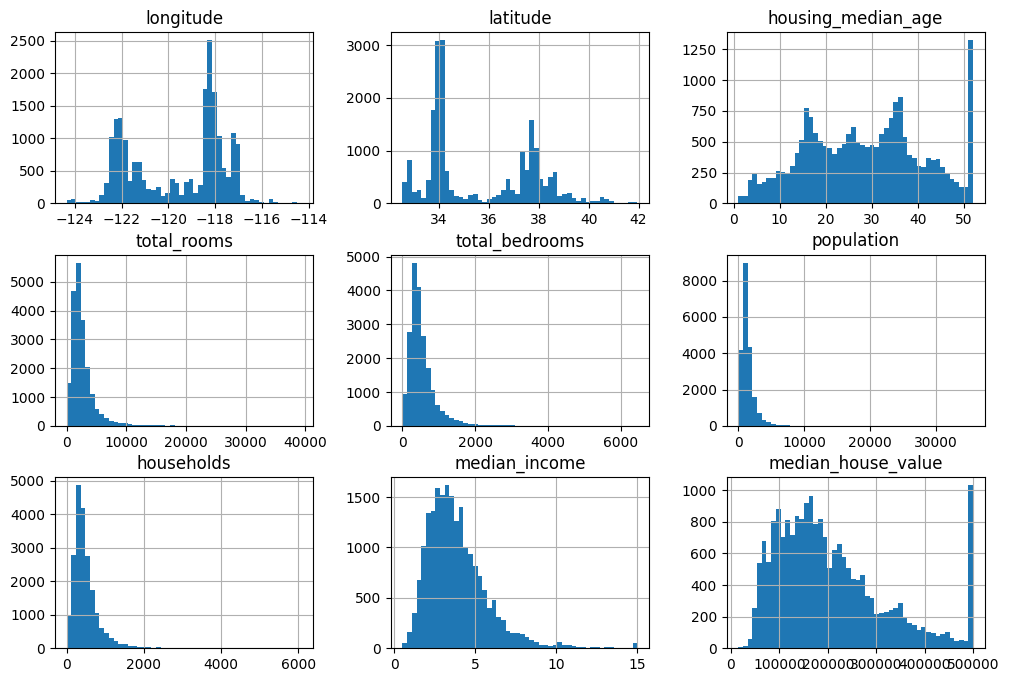

In [95]:
housing.hist(bins=50, figsize=(12, 8));

**Stratified Sampling**

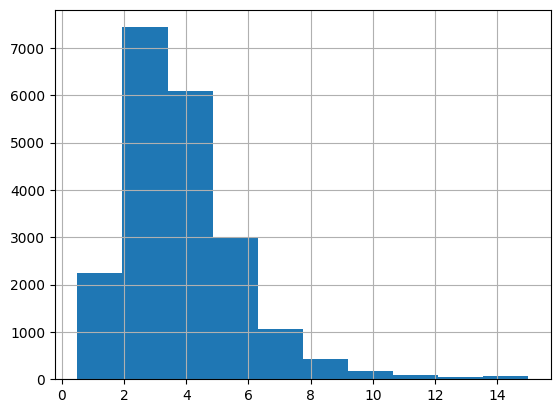

In [96]:
housing['median_income'].hist();

In [97]:
# divide continuos feature income to categories
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

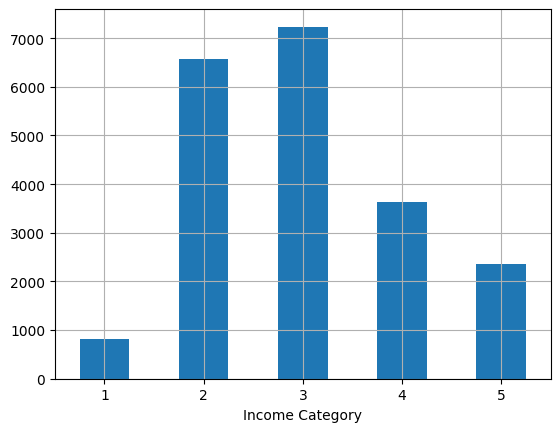

In [98]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.show();

In [99]:
# two ways to perform stratified splitting:

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit

In [101]:
splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=17)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing['income_cat']):
  strat_train_set = housing.iloc[train_index]
  strat_test_set = housing.iloc[test_index]
  strat_splits.append([strat_train_set, strat_test_set])

In [102]:
strat_train_set, strat_test_set = strat_splits[0]

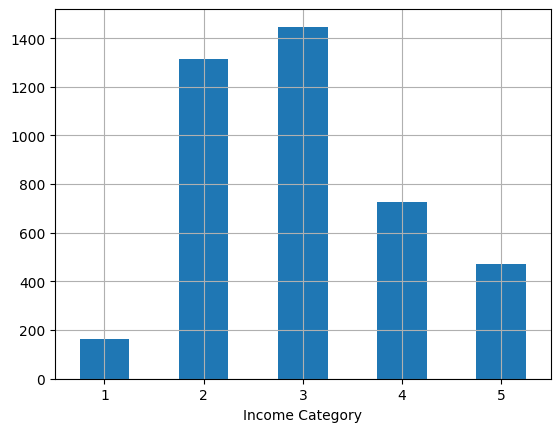

In [103]:
strat_test_set['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.show();

Shorter and easier way to get 1 stratified split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing['income_cat'], random_state=17
)

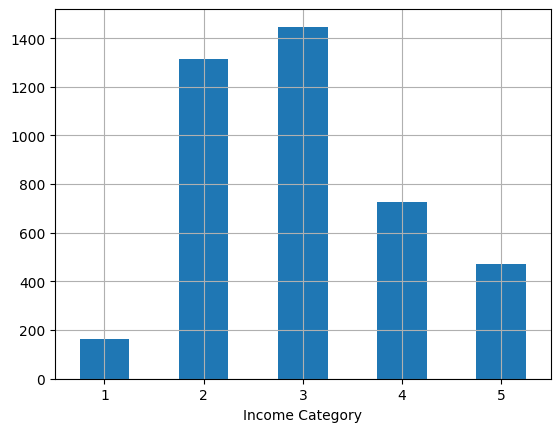

In [106]:
strat_test_set['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.show();

# **DATA VISUALIZATION**

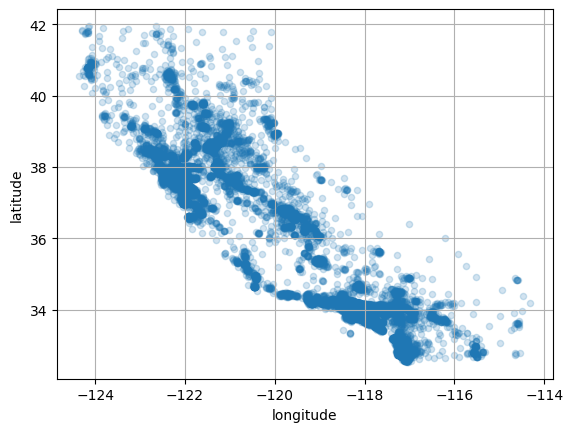

In [107]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)
plt.show();

<Axes: xlabel='longitude', ylabel='latitude'>

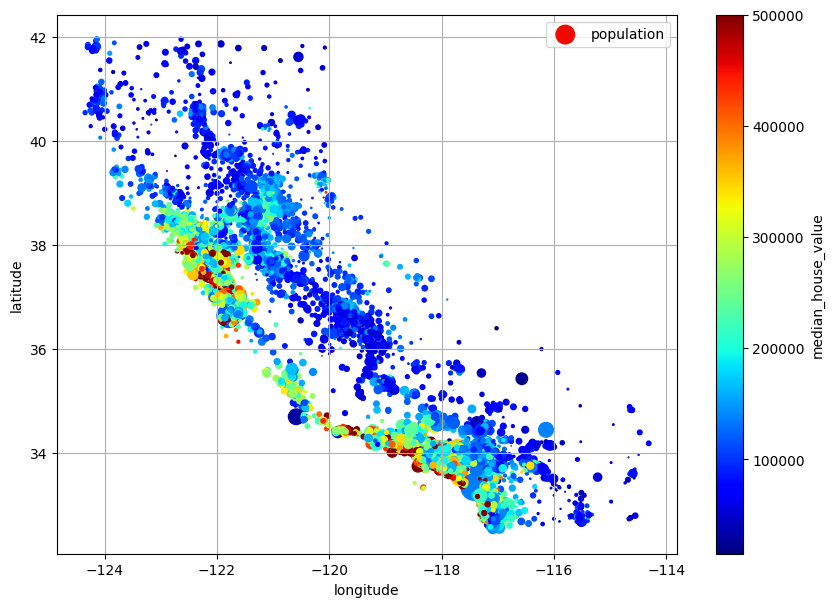

In [108]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=housing["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))

In [109]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

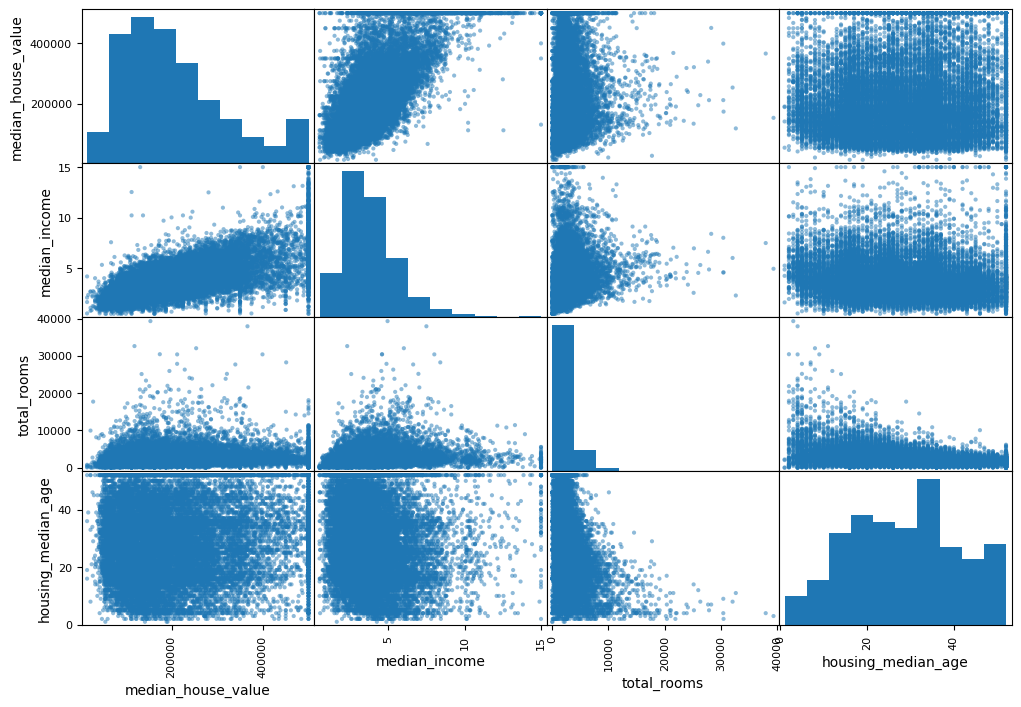

In [110]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

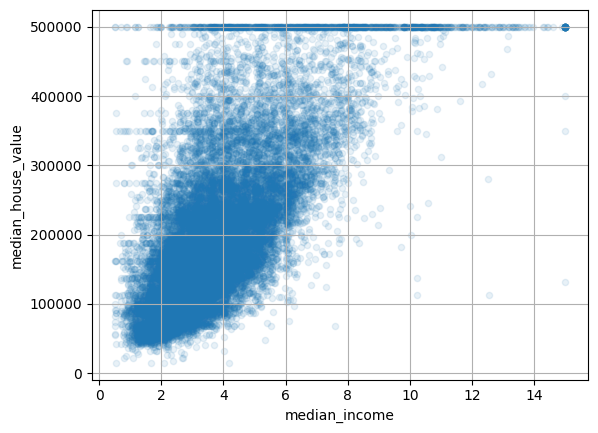

In [111]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
             alpha=0.1, grid=True);

In [112]:
# some feature engineering (why not?)
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [113]:
housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

___
<h1>DATA PREPARATION</h1>

___

In [114]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [115]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        160
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

<img src='https://media.tenor.com/mDQf_FmUMeQAAAAi/pokelawls-nooooo.gif' width=10%>

Nevermind... We have 16k samples

We'll use sklearn imputer to fill NaNs

Now let's work with numeric features

In [116]:
from sklearn.impute import SimpleImputer

In [117]:
imputer = SimpleImputer(strategy='median')

In [118]:
housing_num = housing.select_dtypes(include=[np.number])

In [119]:
X = imputer.fit_transform(housing_num)

In [120]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2128.5   ,  436.    , 1172.    ,
        410.    ,    3.5313])

Missing values can also be replaced with the mean value
(strategy="mean"), or with the most frequent value
(strategy="most_frequent"), or with a constant value
(strategy="constant", fill_value=…). The last two strategies support
non-numerical data

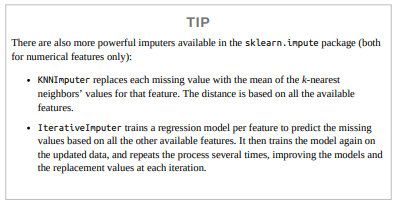

In [121]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3881,-117.98,33.69,22.0,3957.0,520.0,1774.0,527.0,7.0907
13769,-122.30,38.31,34.0,1797.0,395.0,1162.0,407.0,3.4550
17231,-120.52,35.06,11.0,1317.0,234.0,655.0,243.0,4.3611
11195,-119.00,36.07,20.0,1042.0,183.0,509.0,175.0,2.9815
2676,-117.54,33.82,6.0,202.0,29.0,75.0,28.0,4.1250


Let's move on to categorical ones

In [122]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
3881,<1H OCEAN
13769,NEAR BAY
17231,<1H OCEAN
11195,INLAND
2676,INLAND


In [123]:
from sklearn.preprocessing import OrdinalEncoder

In [124]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [125]:
housing_cat_encoded[:5]

array([[0.],
       [3.],
       [0.],
       [1.],
       [1.]])

There's an issue with such data representation.
<br>
ML model may hink that close encoded categories are simmilar (0 and 1), but it's not the case here.<br>
It may work in some *ordered* categorical values, but not here

In [126]:
from sklearn.preprocessing import OneHotEncoder

In [127]:
cat_encoder = OneHotEncoder()
housing_cat_one_hot = cat_encoder.fit_transform(housing_cat)

housing_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [128]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Feature Scaling

**NEVER USE FIT OR FIT TRANSFORM ON NON-TRAIN DATA**
If Our Test Set has some outlier, MinMax Scaled of it will be >1 meaning something is wrong with it and telling it to out model

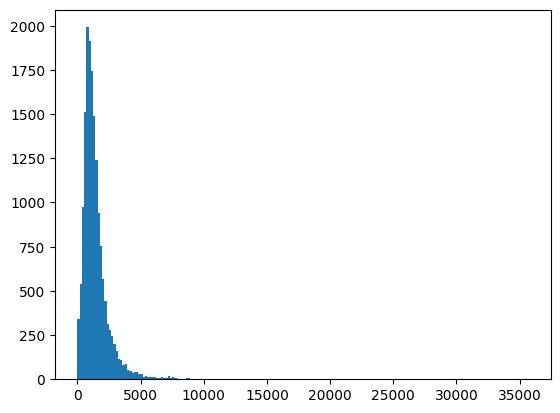

In [129]:
plt.hist(housing['population'], bins=200);

In [130]:
housing['population'].max()

35682.0

In [131]:
from sklearn.metrics.pairwise import rbf_kernel

In [132]:
age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [134]:
# target scaling.
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

In [135]:
model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)

new_data = housing[['median_income']].iloc[:5]  # pretend it's a new data
scaled_pred = model.predict(new_data)
scaled_pred

array([[ 1.17102758],
       [-0.15074155],
       [ 0.1786737 ],
       [-0.32288382],
       [ 0.09283887]])

OH NO!!! OUR MODEL PREDICTS SCALED VALUES<br>
<img src='https://media.tenor.com/UNaQFutfOF0AAAAi/banana-crying-cat.gif' width=20%><br>
But we Have inverse_transform method on our scaler!<br>
<img src='https://media.tenor.com/Nx5Dg2lKTtQAAAAi/cat-jump-happy-happy-happy.gif' width=20%>

In [136]:
predictions = target_scaler.inverse_transform(scaled_pred)
predictions

array([[341786.76568825],
       [189524.33921887],
       [227471.63537199],
       [169694.24902077],
       [217583.81214967]])

However there's a simpler option

In [137]:
from sklearn.compose import TransformedTargetRegressor

In [138]:
model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=StandardScaler()
)

model.fit(housing[['median_income']], housing_labels)
pred = model.predict(new_data)
pred

array([341786.76568825, 189524.33921887, 227471.63537199, 169694.24902077,
       217583.81214967])

**CUSTOM TRANSFORMERS**<br>
<img src='https://static.wikia.nocookie.net/gtawiki/images/f/f2/GTAV-LSCustoms-Logo.png/revision/latest?cb=20150428145357' width=30%>

In [139]:
from sklearn.preprocessing import FunctionTransformer

For simple transformers that don't require fit method we can use simple function

In [140]:
# simple transformer to "normalize" lognorm distribution
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [141]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

In [142]:
class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True):
     self.with_mean = with_mean

  def fit(self, X, y=None):
    X = check_array(X)

    self.mean_ = X.mean(axis=0)
    self.scale_ = X.std(axis=0)
    self.n_features_in_ = X.shape[1]

    return self

  def transform(self, X):
    check_is_fitted(self)

    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    if self.with_mean:
      X = X - self.mean_

    return X / self.scale_

In [143]:
from sklearn.cluster import KMeans

In [144]:
class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self # always return self!

  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [145]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
sample_weight=housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**PIPELINES**

In [146]:
from sklearn.pipeline import Pipeline

Pipeline takes a list of tuple pairs (name, estimator)

In [147]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standartize', StandardScaler()),
])

In [148]:
housing_num_prep = num_pipeline.fit_transform(housing_num)
housing_num_prep[:2].round(2)

array([[ 0.8 , -0.91, -0.52,  0.6 , -0.04,  0.3 ,  0.07,  1.7 ],
       [-1.36,  1.25,  0.43, -0.38, -0.34, -0.23, -0.24, -0.22]])

In [149]:
df_housing_num_prep = pd.DataFrame(
    housing_num_prep, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)

In [150]:
df_housing_num_prep.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3881,0.796995,-0.911069,-0.524448,0.597407,-0.042064,0.297922,0.068318,1.699091
13769,-1.362346,1.252210,0.429577,-0.383123,-0.338570,-0.233575,-0.243612,-0.218717
17231,-0.472618,-0.269577,-1.398970,-0.601019,-0.720471,-0.673884,-0.669917,0.259245
11195,0.287150,0.203348,-0.683452,-0.725855,-0.841446,-0.800679,-0.846678,-0.468485
2676,1.016927,-0.850197,-1.796480,-1.107172,-1.206742,-1.177590,-1.228793,0.134704
